Hola me presento, soy Gomez Diego y el dataset que eleji es sobre el hundimiento del Titanic el mismo cuenta con las siguientes columnas:

*survival: esta columna nos muestra si las personas sobrevivieron o no al Titanic, e donde el valor "1" significa que sobrevivio y el valor "0" que no sobrevivio

*pclass: esta columna nos nuestra las distintas clases socioeconomicos dentro del Titanic donde

 -"1" significa que pertenece a una clase alta

 -"2" que pertenece a una clase media

 -"3" que pertenece a una clase baja


*sex: esta columna nos muestra el sexo de los pasajeros en donde "female" es para femenino y "male" para masculino

*Age: nos muestra las distintas edades de los pasajeros

*sibsp: esta columna nos muestra las distintas relaciones familiasres donde:

 -"0" representa a hermanos: hermanos, hermanas,hermanastros y hermanastras

 -"1" representa a conyuge: marido,esposa

*parch: indica con quien viajaron:

 -"0" representa a Padres= madre, padre

 -"1" representa a Niños = hija, hijo, hijastra, hijastro

*Algunos niños viajaron sólo con una niñera, por lo tanto parch=0 para ellos.

*fare: esta columna representa el valor de la tarifa

*cabin: esta columna representa el numero de cabina en donde viajaban

*embarked: esta columna representa el puerto desde donde se embarcaron

 -"C" = Cherbourg

 -"Q" = Queenstown

 -"S" = Southampton


*hipotesis:

1_Hipótesis sobre la supervivencia según la clase social (Pclass) : ¿Existe una relacion entre la clase socioeconómica de los pasajeros (representada por la columna Pclass) y sus tasas de supervivencia? Por ejemplo, podrías hipotetizar que los pasajeros de primera clase tuvieran una mayor probabilidad de supervivencia en comparación con los de segunda o tercera clase.

2_Hipótesis sobre la supervivencia según el género (Sex) : ¿Hubo una diferencia significativa en las tasas de supervivencia entre hombres y mujeres? Podrías explorar si las mujeres tenían una probabilidad de supervivencia mayor que los hombres, posiblemente debido a la priorización en el acceso a los botes salvavidas.

3_Hipótesis sobre la supervivencia según la edad (Age) : ¿Existe alguna relación entre la edad de los pasajeros y sus posibilidades de sobrevivir? Por ejemplo, podrías investigar si los niños tenían más probabilidades de sobrevivir en comparación con los adultos o los ancianos.

4_Hipótesis sobre la supervivencia según el tamaño de la familia (SibSp y Parch) : ¿Influyó el tamaño de la familia de un pasajero (representado por las columnas SibSp y Parch, que indican el número de hermanos/cónyuges y padres/hijos a bordo, respectivamente) en sus probabilidades de supervivencia? Podrías investigar si los pasajeros que viajaban solos tenían más o menos probabilidades de sobrevivir que aquellos que viajaban con familiares.

5_Hipótesis sobre la influencia del puerto de embarque (Embarked) : ¿Hubo alguna diferencia en las tasas de supervivencia entre los pasajeros que embarcaron en diferentes puertos (representados por la columna Embarked)? Podrías explorar si el puerto de embarque tuviera algún impacto en la probabilidad de supervivencia de los pasajeros

*El dataset fue extraido de Kaggle

https://www.kaggle.com/competitions/titanic/data



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# se importa el dataset con la funcion read_csv de pandas
titanic_data= pd.read_csv("train.csv", sep=",")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Chequeamos si existen valores nulos
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# se elimina la columna "Cabin" porque contiene demasiados NaN (687/891)
# por lo cual no sirve para obtener alguna informacion
titanic_data_SN = titanic_data.drop(columns="Cabin", axis=1)
titanic_data_SN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


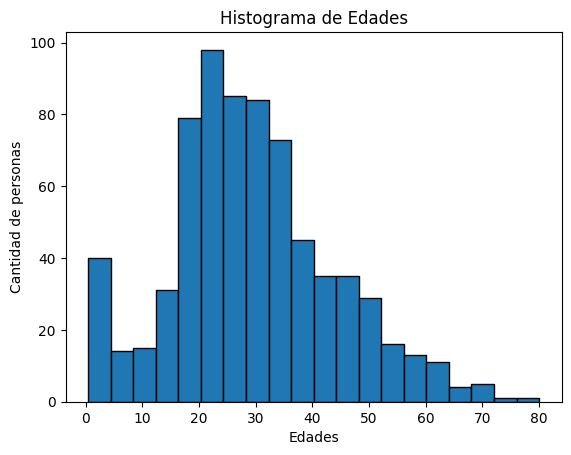

In [7]:
# remplazamos los valores nulos de "Age" del dataset
# pero para ello veremos en un histograma como es la distribucion de frecuencia para poder ver
# si usamos la media, mediana o modo
age = titanic_data["Age"]
plt.hist(age, edgecolor="black", bins=20)
plt.xlabel("Edades")
plt.ylabel("Cantidad de personas")
plt.title("Histograma de Edades")
plt.show()

 En este grafico podemos ver como estan distribuidas las edades en el titanic
 donde la mayoria de los pasajeros estan en el rango de edades de 20 a 30 años
  
 Por lo que se puede ver en este Histograma las edades tienen una distribucion normal por lo que conviene remplazar los valores NaN (nulos) por la media de las dedades


In [8]:
titanic_data["Age"].mean()

29.69911764705882

In [9]:
# remplazamos los valores NaN por la media de las edades
titanic_data_SN["Age"].fillna(titanic_data["Age"].mean(), inplace=True)
titanic_data_SN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [10]:
# ahora remplazamos los valores NaN en Embarked con el modo
titanic_data_SN["Embarked"].fillna(titanic_data_SN["Embarked"].mode()[0],inplace=True)

In [11]:
# ahora probamos el nuevo dataset sin NaN
# chequeamos si existen valores nulos
titanic_data_SN.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# se utiliza esta funcion como un resumen de los valores de la media, mediana, cuartiles
# desvio estandar y valores maximos y minimos
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# se crea una matriz para generar los siguientes valores que muestran las relaciones
# entre las distintas variables numericas
titanic_d=titanic_data[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]]
matriz_titanic=titanic_d.corr().abs()
matriz_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

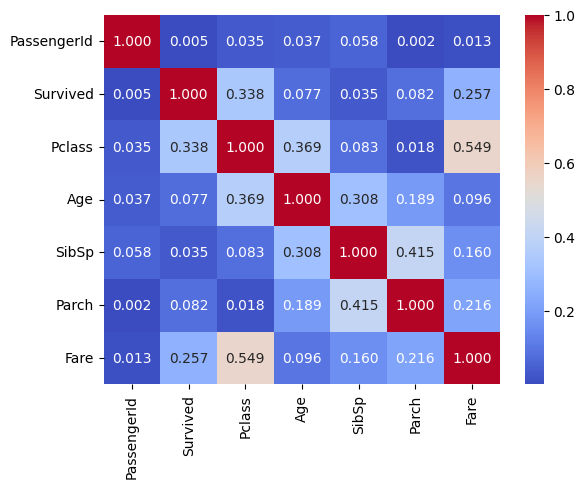

In [14]:
# se utiliza la matriz previamente generada para mostrar las correlaciones
# entre las distintas variables a traves de un grafico
sns.heatmap(matriz_titanic,annot=True, cmap="coolwarm", fmt=".3f")

Por lo que se puede apreciar hay un alto grado de realcion entre las variables
* "Parch" y "survived"
* "Age" y "survived"
* "Pclass" y "SibSp"
* "Age" y "Fare"

In [15]:
# buscamos la cantidad de pasajeros que sobrevivieron al titanic
# 1= sobrevivieron , 0=no sobrevivieron
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

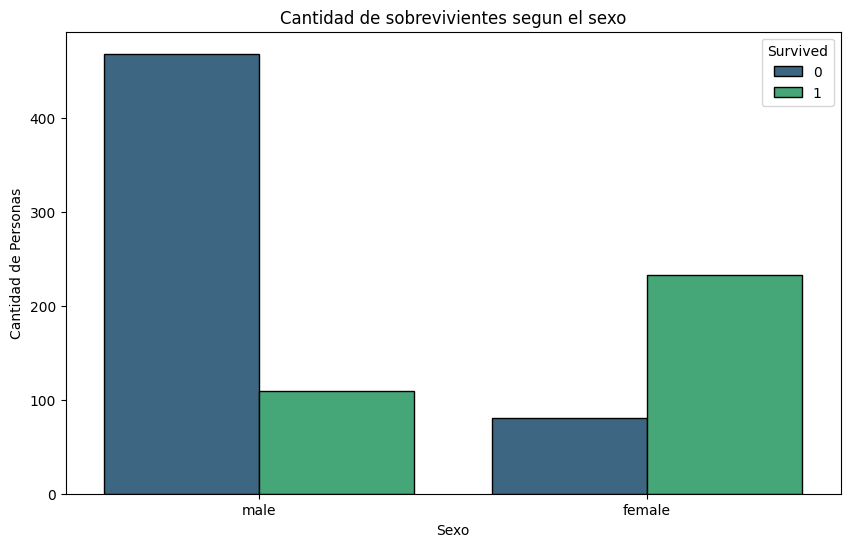

In [16]:
# realizamos un grafico que muestra la realcion entre el numero de cobrevivientes y el sexo de los mismos
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.countplot(data=titanic_data_SN,x="Sex", hue="Survived", palette="viridis",edgecolor="black" )
plt.xlabel("Sexo")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de sobrevivientes segun el sexo")
plt.show()

Por lo que se puede apreciar en el grafico, hay mayor numero de mujeres que sobrevivieron al titanic y mayor numero de hombres que fallecieron en el mismo.

Tambien se puede entender que los pocos hombres que sobrevivivieron fueron niños y adultos

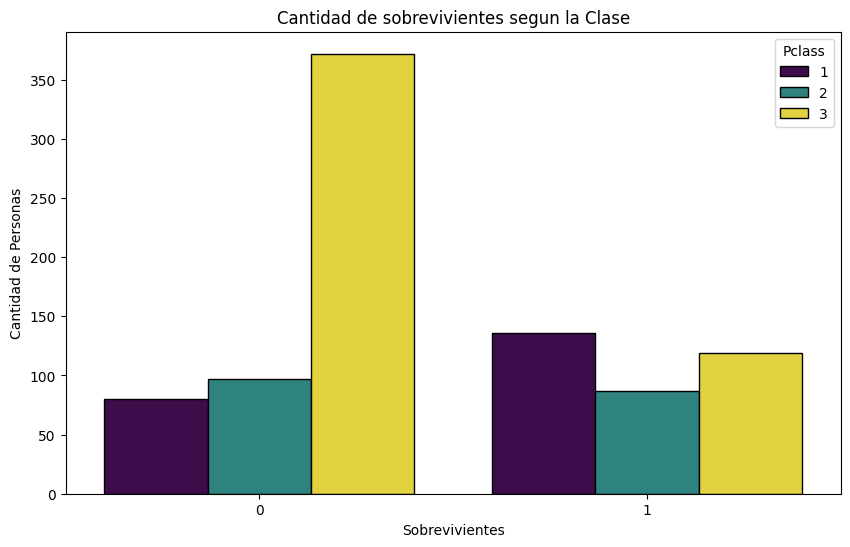

In [17]:
# Relacion entre la clase social y cantidad de sobrevivientes
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.countplot(data=titanic_data_SN,x="Survived", hue="Pclass", palette="viridis",edgecolor="black" )
plt.xlabel("Sobrevivientes")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de sobrevivientes segun la Clase")
plt.show()

Este grafico nos muestra que:

1.La gente de primera clase fueron las que mas sobrevivieron al hundimiento y las que menos murieron

2.La clase media fue la que menos sobrevivientes tubo al hundimiento

3.La clase baja fue la que mas muertos tubo

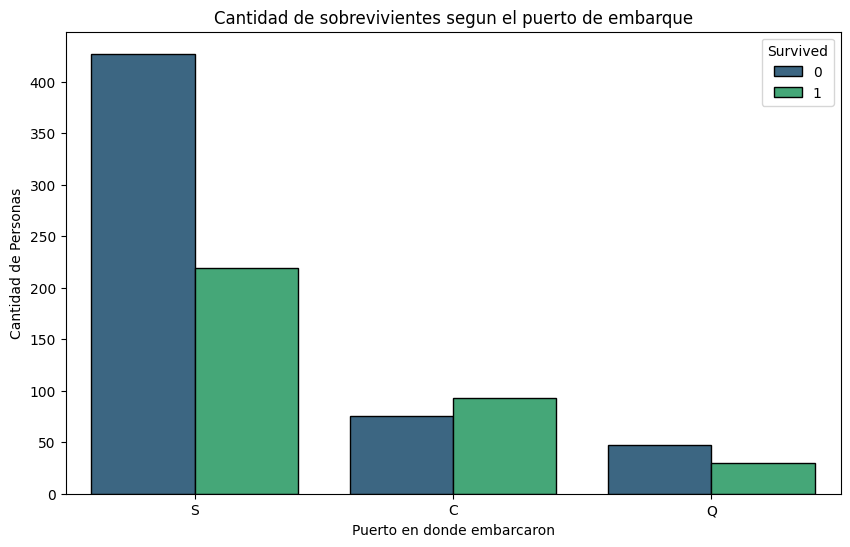

In [18]:
# Relacion entre  el embarque del puerto y los sobrevivientes
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.countplot(data=titanic_data_SN,x="Embarked", hue="Survived", palette="viridis",edgecolor="black" )
plt.xlabel("Puerto en donde embarcaron")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de sobrevivientes segun el puerto de embarque")
plt.show()

Este grafico nos muestra:

1.Que hubo mas muertes de las personas que embarcaron en el puerto de Southampton

2.Que las personas que embarcaron en el puerto de Cherbourg tenian una mayor probabilidad de sobrevivir ya que fueron mas las personas que sobrevivieron en relacion a las que murieron

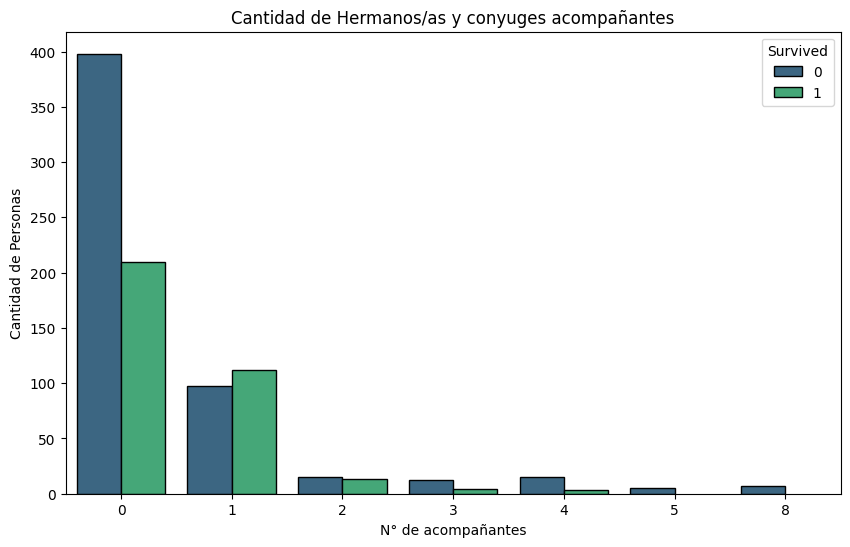

In [19]:
# relacion existente entre la cantidad de acompañantes y la probabilidad de sobrevivir
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.countplot(data=titanic_data_SN,x="SibSp", hue="Survived", palette="viridis",edgecolor="black" )
plt.xlabel("N° de acompañantes")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de Hermanos/as y conyuges acompañantes")
plt.show()

Este grafico nos detalla que la mayoria de personas que viajaron en el titanic viajaban solas (sin hermanos/as ni conyuges)

Tambien nos permite ver que las personas que iban acompañadas de 1 y 2 personas tenian mas probabilidades de sobrevivir que de morir

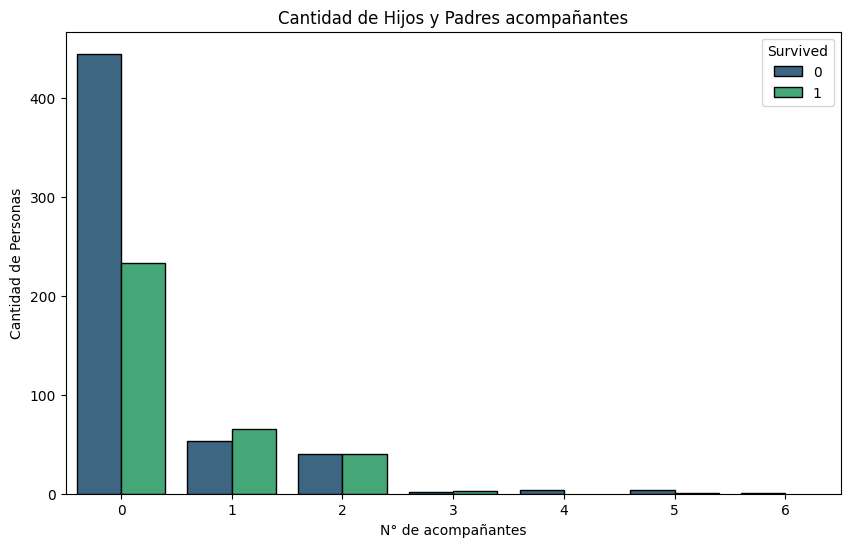

In [20]:
# relacion existente entre la cantidad de acompañantes y la probabilidad de sobrevivir
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.countplot(data=titanic_data_SN,x="Parch", hue="Survived", palette="viridis",edgecolor="black" )
plt.xlabel("N° de acompañantes")
plt.ylabel("Cantidad de Personas")
plt.title("Cantidad de Hijos y Padres acompañantes")
plt.show()

Este grafico nos muestra datos muy parecidos al anterior, indicandonos que la myoria de gente que sobrevivio al titanic fueron personas que viajaban solas

Esto puede ser debido a que como viajaban solas, no tenian la necesidad de estar preocupandose por encontrar a sus acompañantes o preocuparse por los mismos


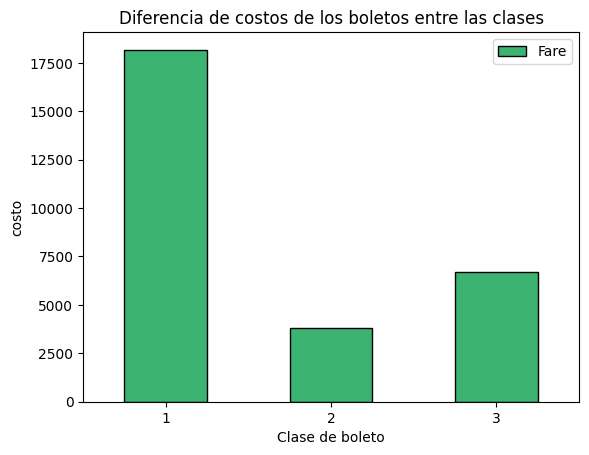

In [21]:
# diferencia entre el costo de primera clase, segunda y tercera
class_fare=titanic_data_SN.pivot_table(index="Pclass",values="Fare", aggfunc=np.sum,)
class_fare.plot(kind="bar",edgecolor="black",color="mediumseagreen")
plt.title("Diferencia de costos de los boletos entre las clases")
plt.xlabel("Clase de boleto")
plt.ylabel("costo")
plt.xticks(rotation=0)
plt.show()

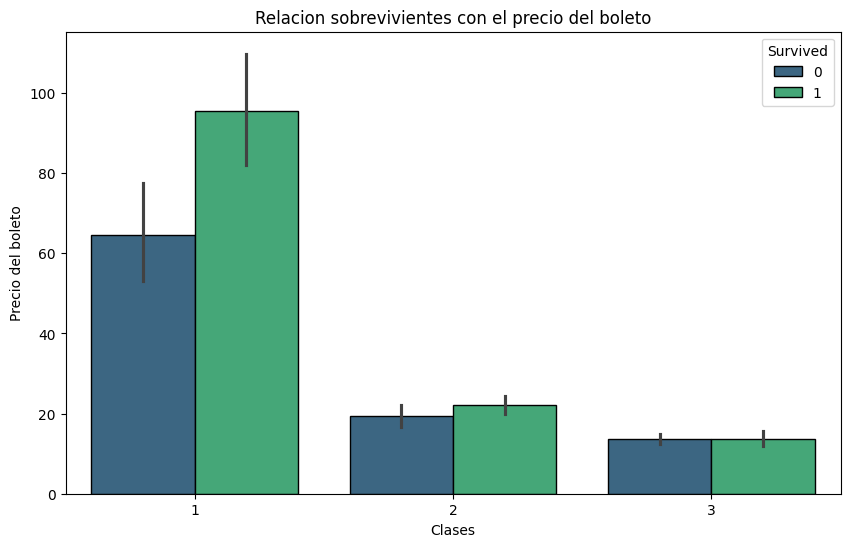

In [22]:
#relacion exixtente entre el valor de la tarifa, la diferencia de clase y el numero de sobrevivientes
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.barplot(data=titanic_data_SN, x="Pclass", y="Fare", hue="Survived", palette="viridis",edgecolor="black" )
plt.xlabel("Clases")
plt.ylabel("Precio del boleto")
plt.title("Relacion sobrevivientes con el precio del boleto")
plt.show()

Este grafico nos detalla que mientras mas altos eran los precios de los voletos. mayores eran las probailidades de sobrevivir, por eso la clase alta fue la que mayor probabilidad de sobrevivir tenian, ya que tenian los voletos mas caros

# Ahora dividimos el dataset en muestra y testeo. Tambien distribuimos similarmente los datos de mayor importancia

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data_SN, titanic_data_SN[["Survived","Pclass","Sex"]]):
    strat_train_set= titanic_data_SN.loc[train_indices]
    Strat_test_set= titanic_data_SN.loc[test_indices]


# Para empezar a entrenar al modelo de Machine Learning se eliminaran algunos datos del dataset y se reemplazaran variables categoricas por numericas con la ayuda de la funcion OneHotEncoder

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self,x):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(x[["Embarked"]]).toarray()

    columns_names=["C","S","Q"]

    for i in range(len(matrix.T)):
      x[columns_names[i]]=matrix.T[i]

    matrix=encoder.fit_transform(x[["Sex"]]).toarray()

    columns_names=["female","male"]

    for i in range(len(matrix.T)):
      x[columns_names[i]]=matrix.T[i]

    return x

In [25]:
class FeatureDropper(BaseEstimator,TransformerMixin):

   def fit(self,c,y=None):
    return self

   def transform(self,x):
    return x.drop(["Enbarked","Name", "Ticket","Cabin","Sex","Embarked"],axis=1,errors="ignore")

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("featureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])

In [27]:
strat_train_set = pipeline.fit_transform(strat_train_set)

# Este dataset ya se encuentra listo para usarlo en un modelo de Machine Learning

In [28]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
23,24,1,1,28.000000,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
564,565,0,3,29.699118,0,0,8.0500,0.0,0.0,1.0,1.0,0.0
315,316,1,3,26.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
698,699,0,1,49.000000,1,1,110.8833,1.0,0.0,0.0,0.0,1.0
507,508,1,1,29.699118,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,1,3,9.000000,0,2,20.5250,0.0,0.0,1.0,0.0,1.0
678,679,0,3,43.000000,1,6,46.9000,0.0,0.0,1.0,1.0,0.0
654,655,0,3,18.000000,0,0,6.7500,0.0,1.0,0.0,1.0,0.0
181,182,0,2,29.699118,0,0,15.0500,1.0,0.0,0.0,0.0,1.0


# Escalamos los datos de entrenamiento de la variable x para que le cueste menos trabajo al modelo poder procesarlo

In [29]:
from sklearn.preprocessing import StandardScaler

x= strat_train_set.drop(["Survived"],axis=1)
y= strat_train_set["Survived"]

scaler= StandardScaler()
x_data=scaler.fit_transform(x)
y_data= y.to_numpy()


Ahora nos queda la variable x_data como matris

In [30]:
x_data

array([[-1.62296307, -1.56828591, -0.12748638, ...,  0.60981061,
        -0.73561236,  0.73561236],
       [ 0.46675033,  0.82789342,  0.00345265, ...,  0.60981061,
         1.35941164, -1.35941164],
       [-0.49505861,  0.82789342, -0.2816123 , ...,  0.60981061,
         1.35941164, -1.35941164],
       ...,
       [ 0.81439211,  0.82789342, -0.89811596, ..., -1.6398534 ,
         1.35941164, -1.35941164],
       [-1.0126586 , -0.37019624,  0.00345265, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       [ 1.41697121,  0.82789342, -0.2816123 , ...,  0.60981061,
        -0.73561236,  0.73561236]])

# Entrenamos los datos con el modelo elejido y usamos la validacion cruzada para validar los datos del modelo

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()
param_gird=[
    {"n_estimators":[10,100,200,500,700],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(rfc,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 700]}],
             return_train_score=True, scoring='accuracy')

In [32]:
final_rfc=grid_search.best_estimator_
final_rfc

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=700)

# Una ves ya entenado el modelo utilizamos los datos de testeo, para poder probar el mismo

In [33]:
strat_test_set=pipeline.fit_transform(Strat_test_set)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
830,831,1,3,15.000000,1,0,14.4542,1.0,0.0,0.0,1.0,0.0
107,108,1,3,29.699118,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
11,12,1,1,58.000000,0,0,26.5500,0.0,0.0,1.0,1.0,0.0
544,545,0,1,50.000000,1,0,106.4250,1.0,0.0,0.0,0.0,1.0
541,542,0,3,9.000000,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,1,3,16.000000,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
569,570,1,3,32.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
31,32,1,1,29.699118,1,0,146.5208,1.0,0.0,0.0,1.0,0.0
58,59,1,2,5.000000,1,2,27.7500,0.0,0.0,1.0,1.0,0.0


In [34]:
x_test=strat_test_set.drop(["Survived"],axis=1)
y_test=strat_test_set["Survived"]

scaler=StandardScaler()
x_data_test= scaler.fit_transform(x_test)
y_data_test= y_test.to_numpy()

Evaluamos la capacidad de prediccion del modelo con los datos de testeo

In [35]:
final_rfc.score(x_data_test,y_data_test)

0.8156424581005587

# Este resultado nos dice que el modelo tiene un 81.5% de probabilidad de realizar predicciones correctas, o sea que de cada 100 predicciones, acierta en 81 de ellas